In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [4]:
df = pd.read_csv('ushape.csv', header = None)

In [5]:
df.head()

,0,1,2
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [8]:
df.columns = ['X', 'Y', 'Class']

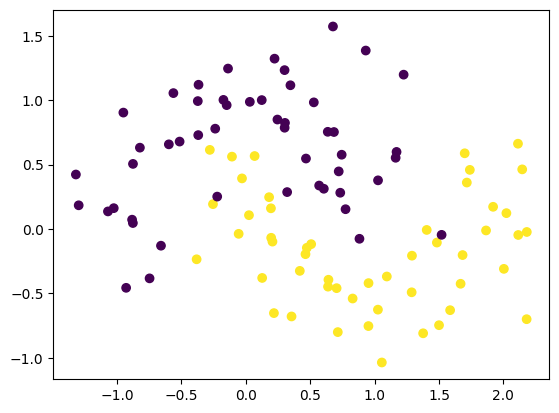

In [10]:
plt.scatter(df['X'], df['Y'], c = df['Class'])
plt.show()

In [11]:
X = df.iloc[:, 0:2].values
Y = df.iloc[:, -1].values


In [14]:
import tensorflow 
from tensorflow import keras 
from keras import Sequential
from keras.layers import Dense

In [15]:
model = Sequential()

model.add(Dense(10, activation = 'relu', input_dim = 2))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.get_weights()

[array([[-0.34271458, -0.21326694,  0.57450837, -0.06339681, -0.07471508,
         -0.6292103 , -0.01807845,  0.30770987,  0.23558772, -0.10738581],
        [-0.59931165, -0.2758346 , -0.3955421 ,  0.27337474, -0.6003232 ,
          0.08927834,  0.2547391 ,  0.38339287, -0.68294585,  0.2990027 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.45800304,  0.19506288, -0.00328964, -0.13816416,  0.2776025 ,
          0.47066557, -0.01676363, -0.1498614 , -0.19926372,  0.03947955],
        [ 0.4180194 ,  0.5022886 , -0.23100385,  0.0638662 , -0.02547407,
         -0.2129148 ,  0.5303408 , -0.53387487,  0.05711466,  0.29392773],
        [-0.26463777, -0.35234016, -0.34984714,  0.28868008, -0.35057086,
         -0.30735365, -0.10997024, -0.19864681,  0.32282913, -0.06226608],
        [ 0.43546444, -0.45099896,  0.07884973,  0.18652362, -0.50795484,
         -0.3080297 ,  0.43796504,  0.4427278 , -0.3147838 ,  0.13454771],
        [ 0.26979

In [17]:
initial_weights = model.get_weights()

In [18]:
initial_weights[0] = np.random.randn(2, 10) * np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [19]:
model.set_weights(initial_weights)

In [20]:
model.get_weights()

[array([[ 3.3104402e-01,  3.4343296e-01, -2.4026734e-01,  6.8618286e-01,
         -1.2718630e-03, -1.5692127e-01,  7.3729652e-01, -1.3958077e-02,
         -4.8965788e-01,  4.5874313e-01],
        [-7.6241893e-01, -1.5897285e+00,  8.9911833e-02,  1.7421496e+00,
         -1.8951845e-01, -2.6537657e-01,  9.0938944e-01, -7.3844898e-01,
          2.9424199e-01, -1.2694672e-01]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[-8.4686980e-02, -8.1855781e-02,  4.3959713e-01, -8.1182847e-04,
         -4.1994721e-02, -4.6806909e-02,  3.2592379e-02, -6.6090263e-02,
          4.4058073e-01,  4.7487822e-01],
        [ 6.0056663e-01, -4.0762398e-01, -3.9894484e-02,  4.0688545e-01,
         -1.5939020e-01, -2.0998017e-01,  6.4696443e-01,  1.5812559e-01,
          6.0477579e-01, -1.3074422e-01],
        [-2.8701564e-02, -1.3942802e-01,  3.9016536e-01, -5.5528890e-02,
         -2.7364653e-01, -1.0548661e-01,  8.8444747e-02,  2.8888270e-01,
          8.2057782e

In [21]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
history = model.fit(X,Y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step - accuracy: 0.4922 - loss: 0.7392 - val_accuracy: 0.5000 - val_loss: 0.7335
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4961 - loss: 0.7399 - val_accuracy: 0.5000 - val_loss: 0.7254
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4766 - loss: 0.7257 - val_accuracy: 0.5000 - val_loss: 0.7188
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5234 - loss: 0.7141 - val_accuracy: 0.5000 - val_loss: 0.7128
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4844 - loss: 0.7176 - val_accuracy: 0.5000 - val_loss: 0.7070
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5234 - loss: 0.7010 - val_accuracy: 0.5000 - val_loss: 0.7021
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5117 - loss: 0.6961 - val_accuracy: 0.5000 - val_loss: 0.6976
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5195 - loss: 0.6926 - val_accuracy: 0.5000 - val_loss:

In [24]:
model.get_weights()

[array([[ 0.5266961 ,  0.24576448, -0.4843394 ,  0.59458816,  0.17316598,
         -0.31863472,  0.6645885 ,  0.20823649, -0.7352474 ,  0.5139203 ],
        [-0.9196465 , -1.5426798 , -0.1012992 ,  1.9541147 , -0.34611604,
         -0.24596795,  1.0692064 , -0.8271274 ,  0.46344897, -0.3227051 ]],
       dtype=float32),
 array([ 0.11724777, -0.07047515, -0.01093187,  0.1484382 ,  0.03920835,
         0.27914914, -0.05637536,  0.14336877,  0.0770034 , -0.1459815 ],
       dtype=float32),
 array([[-0.15177655, -0.08185578,  0.56763417, -0.17797238,  0.1052243 ,
         -0.25284606, -0.11159489, -0.06609026,  0.37594795,  0.7273018 ],
        [ 0.5370069 , -0.40762398,  0.0300685 ,  0.32932934,  0.02523257,
         -0.12356093,  0.5987117 ,  0.1581256 ,  0.54176277,  0.07502078],
        [ 0.0178902 , -0.13942802,  0.34708324,  0.2677543 , -0.22831246,
          0.16941635,  0.08812617,  0.2888827 ,  0.3384205 , -0.5430521 ],
        [ 0.0045279 , -0.3111351 , -0.01150622,  0.01915699, 

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 2s 197us/step


<Axes: >

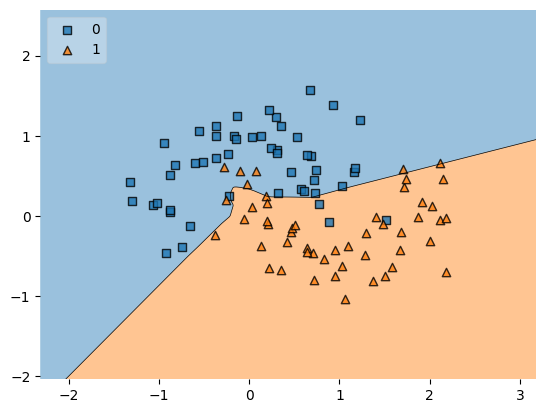

In [26]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,Y.astype('int'), clf=model, legend=2)

In [27]:
(np.random.randn(10,10)*0.01).min()

-0.02375394611969707

In [28]:
(np.random.randn(10,10)*0.01).max()

0.019864235384197515

```ekhane amra jei code gula korlam seta chilo Xavier/Glorot er Normal form use kore```

- ```amra jodi uniform use kore kori both Glorat and He er jonno tahole nicher moto hobe```

In [29]:
# model.add(Dense(10, activation = 'relu', input_dim = 2, kernel_initializer = 'glorot_uniform'))
# model.add(Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform'))
# model.add(Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform'))
# model.add(Dense(10, activation = 'relu', kernel_initializer = 'glorot_uniform'))
# model.add(Dense(1, activation='sigmoid'))

- ``` He_Normal er jonno hobe :```

In [ ]:
# model.add(Dense(10, activation = 'relu', input_dim = 2, kernel_initializer = 'he_normal'))
# model.add(Dense(10, activation = 'relu', kernel_initializer = 'he_normal'))
# model.add(Dense(10, activation = 'relu', kernel_initializer = 'he_normal'))
# model.add(Dense(10, activation = 'relu', kernel_initializer = 'he_normal'))
# model.add(Dense(1, activation='sigmoid'))

- ```He_uniform er jonno hobe: ```

In [31]:
# model.add(Dense(10, activation = 'relu', input_dim = 2, kernel_initializer = 'he_uniform'))
# model.add(Dense(10, activation = 'relu', kernel_initializer = 'he_uniform'))
# model.add(Dense(10, activation = 'relu', kernel_initializer = 'he_uniform'))
# model.add(Dense(10, activation = 'relu', kernel_initializer = 'he_uniform'))
# model.add(Dense(1, activation='sigmoid'))